# Code for Bare AFM Image

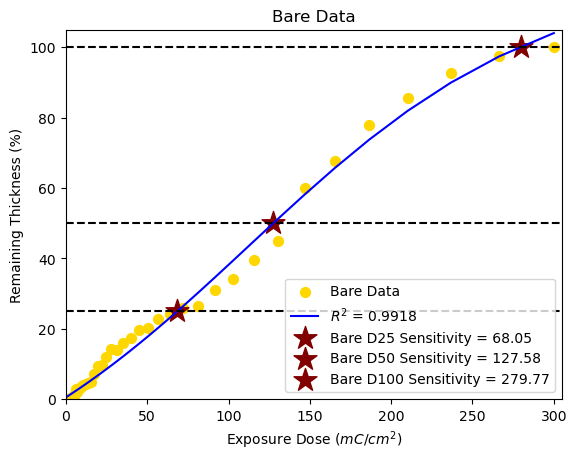

In [2]:
import pandas as pd
from numpy import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.interpolate import interp1d
import warnings

# Determination of dose sensitivity based off dose series
# Curve fitting using sigmoidal curve equation S(x) = 1/(1+e^-x)

# Code to read csv file
afm_data = pd.read_csv('100kV_EBL_dose_test_results.csv')
exposure_dose = afm_data["Dose (mC/cm2)"] # Store the exposure dose data
bare_thickness = afm_data["Bare"] # Store the bare remaining thickness data

# Define the sigmoidal curve function
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + exp(-k*(x-x0))) + b
    return (y)

# Initial guesses
p0 = [max(bare_thickness), median(exposure_dose),1,min(bare_thickness)]

# Covariance can't be measured so this prevents the warnings from popping up
warnings.filterwarnings('ignore')

# Curve fitting of original Bare data
bare,_ = curve_fit(sigmoid,exposure_dose,bare_thickness,p0,method = 'dogbox')

# Fitted data
bare_model = sigmoid(exposure_dose,*bare)

# Interpolation using the original data
original_interp = interp1d(bare_thickness,exposure_dose)

# Interpolation using the curve fit model
fitted_interp = interp1d(bare_model,exposure_dose)

# If statement to find best dose sensitivities 
if original_interp(25) < fitted_interp(25):
    bare_D25 = original_interp(25)
else:
    bare_D25 = fitted_interp(25)

if original_interp(50) < fitted_interp(50):
    bare_D50 = original_interp(50)
else:
    bare_D50 = fitted_interp(50)

# Handle the case where 100% thickness is not within the interpolation range
if max(bare_model) < 100 or original_interp(100) < fitted_interp(100):
    bare_D100 = original_interp(100)
else:
    bare_D100 = fitted_interp(100)
    
# Calculation of the R2 value between the original and fitted data
r2_bare = r2_score(bare_thickness,bare_model)

# Graph of all data
plt.scatter(exposure_dose,bare_thickness,s = 50,c = 'gold',label = 'Bare Data')
plt.plot(exposure_dose,bare_model,c = 'blue',label = f'$R^{2}$ = {r2_bare:0.4f}')

plt.scatter(bare_D25,25,s = 300,c = 'maroon',marker = '*',label = f'Bare D25 Sensitivity = {bare_D25:.2f}')
plt.scatter(bare_D50,50,s = 300,c = 'maroon',marker = '*',label = f'Bare D50 Sensitivity = {bare_D50:.2f}')
plt.scatter(bare_D100,100,s = 300,c = 'maroon',marker = '*',label = f'Bare D100 Sensitivity = {bare_D100:.2f}')

plt.title('Bare Data')
plt.xlabel('Exposure Dose ($mC/cm^{2}$)')
plt.ylabel('Remaining Thickness (%)')
plt.xlim(0,305)
plt.ylim(0,105)

plt.axhline(25, color='black', linestyle='--')
plt.axhline(50, color='black', linestyle='--')
plt.axhline(100, color='black', linestyle='--')

plt.legend(loc = 'lower right')
plt.savefig('bare_data.png') # Save data as png file 
plt.show()

# Code for PAB AFM 

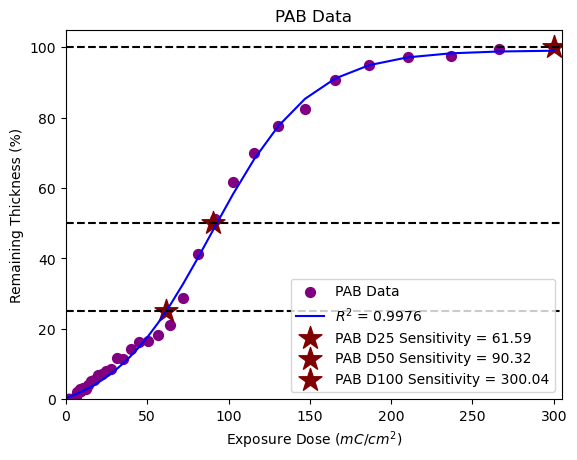

In [4]:
import pandas as pd
from numpy import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.interpolate import interp1d
import warnings

# Determination of dose sensitivity based off dose series
# Curve fitting using sigmoidal curve equation S(x) = 1/(1+e^-x)

# Code to read csv file
afm_data = pd.read_csv('100kV_EBL_dose_test_results.csv')
exposure_dose = afm_data["Dose (mC/cm2)"] # Store the exposure dose data
pab_thickness = afm_data["PAB"] # Store the PAB remaining thickness data

# Define the sigmoidal curve function
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + exp(-k*(x-x0))) + b
    return (y)

# Initial guesses
p0 = [max(pab_thickness), median(exposure_dose),1,min(pab_thickness)]

# Covariance can't be measured so this prevents the warnings from popping up
warnings.filterwarnings('ignore')

# Curve fitting of original PAB data
pab,_ = curve_fit(sigmoid,exposure_dose,pab_thickness,p0,method = 'dogbox')

# Fitted data
pab_model = sigmoid(exposure_dose,*pab)

# Interpolation using the original data
original_interp = interp1d(pab_thickness,exposure_dose)

# Interpolation using the curve fit model
fitted_interp = interp1d(pab_model,exposure_dose)

# If statement to find best dose sensitivities 
if original_interp(25) < fitted_interp(25):
    pab_D25 = original_interp(25)
else:
    pab_D25 = fitted_interp(25)

if original_interp(50) < fitted_interp(50):
    pab_D50 = original_interp(50)
else:
    pab_D50 = fitted_interp(50)

# Handle the case where 100% thickness is not within the interpolation range
if max(pab_model) < 100 or original_interp(100) < fitted_interp(100):
    pab_D100 = original_interp(100)
else:
    pab_D100 = fitted_interp(100)
        
# Calculation of the R2 value between the original and fitted data
r2_pab = r2_score(pab_thickness,pab_model)

# Graphing of all data
plt.scatter(exposure_dose,pab_thickness,s = 50,c = 'purple',label = 'PAB Data')
plt.plot(exposure_dose,pab_model,c = 'blue',label = f'$R^{2}$ = {r2_pab:0.4f}')

plt.scatter(pab_D25,25,s = 300,c = 'maroon',marker = '*',label = f'PAB D25 Sensitivity = {pab_D25:.2f}')
plt.scatter(pab_D50,50,s = 300,c = 'maroon',marker = '*',label = f'PAB D50 Sensitivity = {pab_D50:.2f}')
plt.scatter(pab_D100,100,s = 300,c = 'maroon',marker = '*',label = f'PAB D100 Sensitivity = {pab_D100:.2f}')

plt.title('PAB Data')
plt.xlabel('Exposure Dose ($mC/cm^{2}$)')
plt.ylabel('Remaining Thickness (%)')
plt.xlim(0,305)
plt.ylim(0,105)

plt.axhline(25, color='black', linestyle='--')
plt.axhline(50, color='black', linestyle='--')
plt.axhline(100, color='black', linestyle='--')

plt.legend(loc = 'lower right')
plt.savefig('pab_data.png') # Save data as png file 
plt.show()

# Code for PEB AFM Image

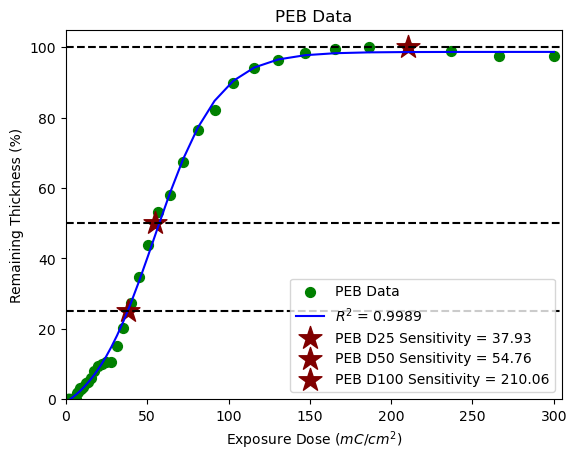

In [6]:
import pandas as pd
from numpy import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.interpolate import interp1d
import warnings

# Determination of dose sensitivity based off dose series
# Curve fitting using sigmoidal curve equation S(x) = 1/(1+e^-x)

# Code to read csv file
afm_data = pd.read_csv('100kV_EBL_dose_test_results.csv')
exposure_dose = afm_data["Dose (mC/cm2)"] # Store the exposure dose data
peb_thickness = afm_data["PEB"] # Store the PEB remaining thickness data

# Define the sigmoidal curve function
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + exp(-k*(x-x0))) + b
    return (y)

# Initial guesses
p0 = [max(peb_thickness), median(exposure_dose),1,min(peb_thickness)]

# Covariance can't be measured so this prevents the warnings from popping up
warnings.filterwarnings('ignore')

# Curve fitting of original PEB data
peb,_ = curve_fit(sigmoid,exposure_dose,peb_thickness,p0,method = 'dogbox')

# Fitted data
peb_model = sigmoid(exposure_dose,*peb)

# Interpolation using the original data
original_interp = interp1d(peb_thickness,exposure_dose)

# Interpolation using the curve fit model
fitted_interp = interp1d(peb_model,exposure_dose)

# If statement to find best dose sensitivities 
if original_interp(25) < fitted_interp(25):
    peb_D25 = original_interp(25)
else:
    peb_D25 = fitted_interp(25)

if original_interp(50) < fitted_interp(50):
    peb_D50 = original_interp(50)
else:
    peb_D50 = fitted_interp(50)

# Handle the case where 100% thickness is not within the interpolation range
if max(peb_model) < 100 or original_interp(100) < fitted_interp(100):
    peb_D100 = original_interp(100)
else:
    peb_D100 = fitted_interp(100)
        
# Calculation of the R2 value between the original and fitted data
r2_peb = r2_score(peb_thickness,peb_model)

# Graphing of all data
plt.scatter(exposure_dose,peb_thickness,s = 50,c = 'green',label = 'PEB Data')
plt.plot(exposure_dose,peb_model,c = 'blue',label = f'$R^{2}$ = {r2_peb:0.4f}')

plt.scatter(peb_D25,25,s = 300,c = 'maroon',marker = '*',label = f'PEB D25 Sensitivity = {peb_D25:.2f}')
plt.scatter(peb_D50,50,s = 300,c = 'maroon',marker = '*',label = f'PEB D50 Sensitivity = {peb_D50:.2f}')
plt.scatter(peb_D100,100,s = 300,c = 'maroon',marker = '*',label = f'PEB D100 Sensitivity = {peb_D100:.2f}')

plt.title('PEB Data')
plt.xlabel('Exposure Dose ($mC/cm^{2}$)')
plt.ylabel('Remaining Thickness (%)')
plt.xlim(0,305)
plt.ylim(0,105)

plt.axhline(25, color='black', linestyle='--')
plt.axhline(50, color='black', linestyle='--')
plt.axhline(100, color='black', linestyle='--')

plt.legend(loc = 'lower right')
plt.savefig('peb_data.png') # Save data as png file 
plt.show()

# Code for PAB + PEB AFM Image

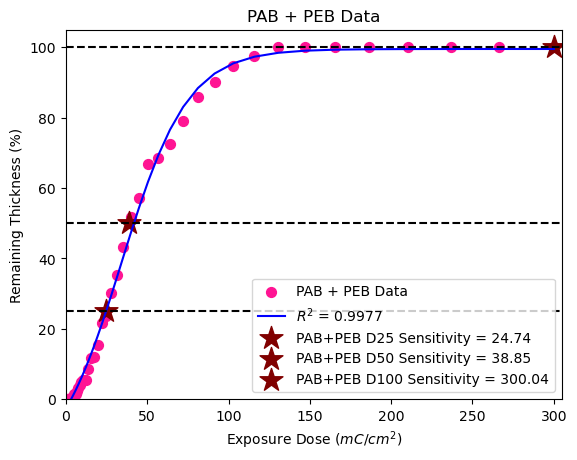

In [10]:
import pandas as pd
from numpy import *
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy.interpolate import interp1d
import warnings

# Determination of dose sensitivity based off dose series
# Curve fitting using sigmoidal curve equation S(x) = 1/(1+e^-x)

# Code to read csv file
afm_data = pd.read_csv('100kV_EBL_dose_test_results.csv')
exposure_dose = afm_data["Dose (mC/cm2)"] # Store the exposure dose data
pab_peb_thickness = afm_data["PAB+PEB"] # Store the PAB + PEB remaining thickness data

# Define the sigmoidal curve function
def sigmoid(x, L ,x0, k, b):
    y = L / (1 + exp(-k*(x-x0))) + b
    return (y)

# Initial guesses
p0 = [max(pab_peb_thickness), median(exposure_dose),1,min(pab_peb_thickness)]

# Covariance can't be measured so this prevents the warnings from popping up
warnings.filterwarnings('ignore')

# Curve fitting of original PAB + PEB data
pab_peb,_ = curve_fit(sigmoid,exposure_dose,pab_peb_thickness,p0,method = 'dogbox')

# Fitted data
pab_peb_model = sigmoid(exposure_dose,*pab_peb)

# Interpolation using the original data
original_interp = interp1d(pab_peb_thickness,exposure_dose)

# Interpolation using the curve fit model
fitted_interp = interp1d(pab_peb_model,exposure_dose)

# If statement to find best dose sensitivities 
if original_interp(25) < fitted_interp(25):
    pab_peb_D25 = original_interp(25)
else:
    pab_peb_D25 = fitted_interp(25)

if original_interp(50) < fitted_interp(50):
    pab_peb_D50 = original_interp(50)
else:
    pab_peb_D50 = fitted_interp(50)

# Handle the case where 100% thickness is not within the interpolation range
if max(pab_peb_model) < 100 or original_interp(100) < fitted_interp(100):
    pab_peb_D100 = original_interp(100)
else:
    pab_peb_D100 = fitted_interp(100)

# Calculation of the R2 value between the original and fitted data
r2_pab_peb = r2_score(pab_peb_thickness,pab_peb_model)

# Graphing of all data
plt.scatter(exposure_dose,pab_peb_thickness,s = 50,c = 'deeppink',label = 'PAB + PEB Data')
plt.plot(exposure_dose,pab_peb_model,c = 'blue',label = f'$R^{2}$ = {r2_pab_peb:0.4f}')

plt.scatter(pab_peb_D25,25,s = 300,c = 'maroon',marker = '*',label = f'PAB+PEB D25 Sensitivity = {pab_peb_D25:.2f}')
plt.scatter(pab_peb_D50,50,s = 300,c = 'maroon',marker = '*',label = f'PAB+PEB D50 Sensitivity = {pab_peb_D50:.2f}')
plt.scatter(pab_peb_D100,100,s = 300,c = 'maroon',marker = '*',label = f'PAB+PEB D100 Sensitivity = {pab_peb_D100:.2f}')

plt.title('PAB + PEB Data')
plt.xlabel('Exposure Dose ($mC/cm^{2}$)')
plt.ylabel('Remaining Thickness (%)')
plt.xlim(0,305)
plt.ylim(0,105)

plt.axhline(25, color='black', linestyle='--')
plt.axhline(50, color='black', linestyle='--')
plt.axhline(100, color='black', linestyle='--')

plt.legend(loc = 'lower right')
plt.savefig('pab_peb_data.png') # Save data as png file 
plt.show()

# Code for All AFM Images

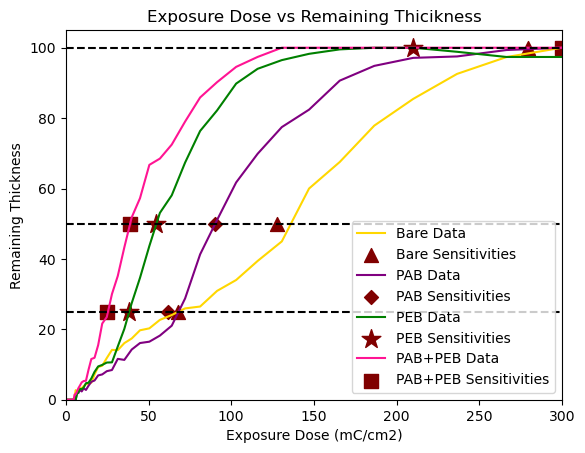

In [16]:
import pandas as pd
from numpy import *
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from matplotlib.ticker import MultipleLocator
from matplotlib import *

# Code to read csv data
afm_data = pd.read_csv('100kV_EBL_dose_test_results.csv')
exposure_dose = afm_data["Dose (mC/cm2)"]
bare_thickness = afm_data["Bare"]
pab_thickness = afm_data["PAB"]
peb_thickness = afm_data["PEB"]
pab_peb_thickness = afm_data["PAB+PEB"]

sensitivity = [25,50,100]
bare_sensitivity = [bare_D25,bare_D50,bare_D100]
pab_sensitivity = [pab_D25,pab_D50,pab_D100]
peb_sensitivity = [peb_D25,peb_D50,peb_D100]
pab_peb_sensitivity = [pab_peb_D25,pab_peb_D50,pab_peb_D100]

# Plot bare data
plt.plot(exposure_dose,bare_thickness,c = 'gold',label = 'Bare Data')
plt.scatter(bare_sensitivity,sensitivity,s = 100,c = 'maroon',marker = '^',label = 'Bare Sensitivities')

# Plot PAB data
plt.plot(exposure_dose,pab_thickness,c = 'purple',label = 'PAB Data')
plt.scatter(pab_sensitivity,sensitivity,s = 50,c = 'maroon',marker = 'D',label = 'PAB Sensitivities')

# Plot PEB data
plt.plot(exposure_dose,peb_thickness,c = 'green',label = 'PEB Data')
plt.scatter(peb_sensitivity,sensitivity,s = 200,c = 'maroon',marker = '*',label = 'PEB Sensitivities')

# Plot PAB + PEB data
plt.plot(exposure_dose,pab_peb_thickness,c = 'deeppink',label = 'PAB+PEB Data')
plt.scatter(pab_peb_sensitivity,sensitivity,s = 100,c = 'maroon',marker = 's',label = 'PAB+PEB Sensitivities')

plt.title('Exposure Dose vs Remaining Thicikness')
plt.xlabel('Exposure Dose (mC/cm2)')
plt.ylabel('Remaining Thickness')
plt.xlim(0,300)
plt.ylim(0,105)

plt.axhline(25, color = 'black', linestyle = '--')
plt.axhline(50, color = 'black', linestyle = '--')
plt.axhline(100, color = 'black', linestyle = '--')

plt.legend()
plt.savefig('Complete_data.png') # Save data as png file 
plt.show()